# Diamond Price Prediction




In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD THE DATA 

In [2]:
# Load the new CSV file uploaded by the user
file_path_new = "D:\INNOMATICS FILE\DATA SET\diamonds.csv"
df_new = pd.read_csv(file_path_new)

# Display the first few rows of the new file to understand the dataset
df_new.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df_new.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_range,cut_encoded,clarity_encoded
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,"(0.5, 1.0]",2,2
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,"(0.5, 1.0]",1,2
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,"(0.5, 1.0]",4,2
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,"(0.5, 1.0]",3,3
53939,0.75,2,0,3,62.2,55.0,2757,5.83,5.87,3.64,"(0.5, 1.0]",2,3


# Actual Vs Predicted Diamond Prices (Linear Regression)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

# Preprocessing: Encode categorical variables
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df_new[column] = le.fit_transform(df_new[column])
    label_encoders[column] = le

# Select features and target variable
X = df_new[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df_new['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

# Output the Mean Absolute Error
mae




267.9755022379363

# Carat Vs Price (Colored By Cut Quality)

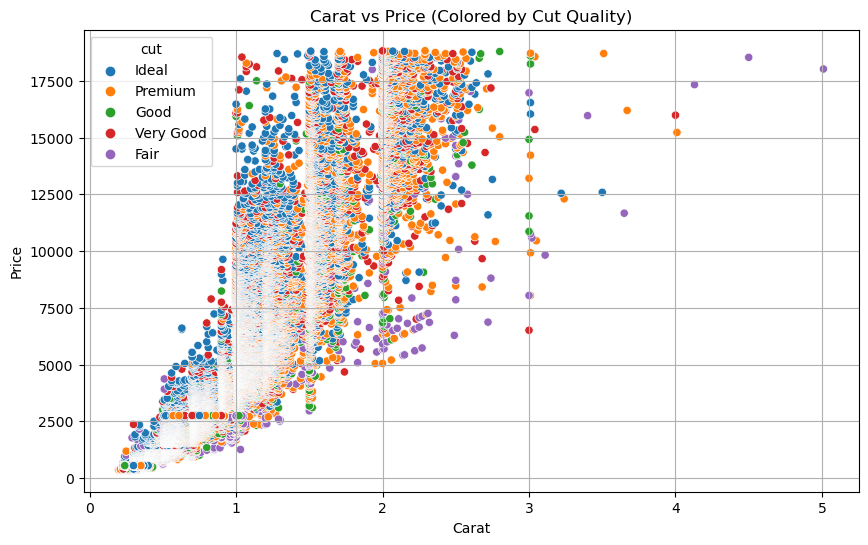

In [5]:
import seaborn as sns

#  Carat vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df_new, hue='cut')
plt.title('Carat vs Price (Colored by Cut Quality)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Cut vs Price

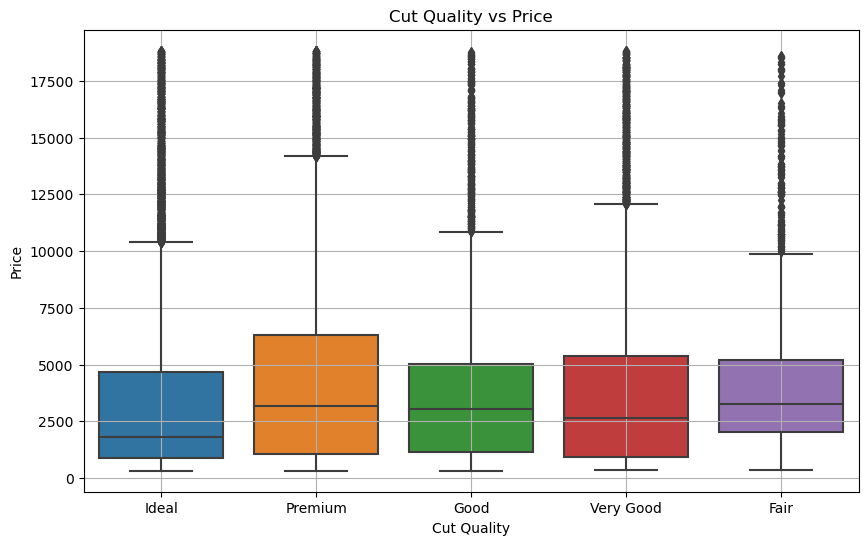

In [6]:
#  Cut vs Price (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df_new)
plt.title('Cut Quality vs Price')
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Correlation Heatmap of Numeric Features

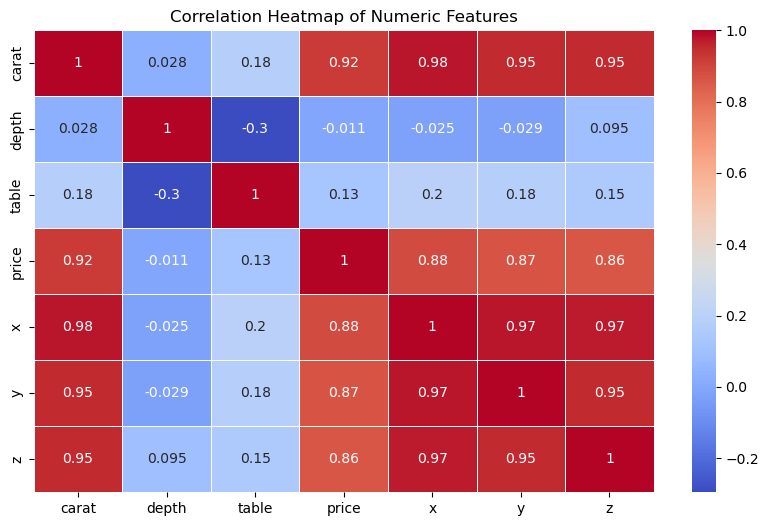

In [7]:
# Correlation Heatmap of Numeric Features
plt.figure(figsize=(10, 6))
corr_matrix = df_new[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Price Trends by Clarity

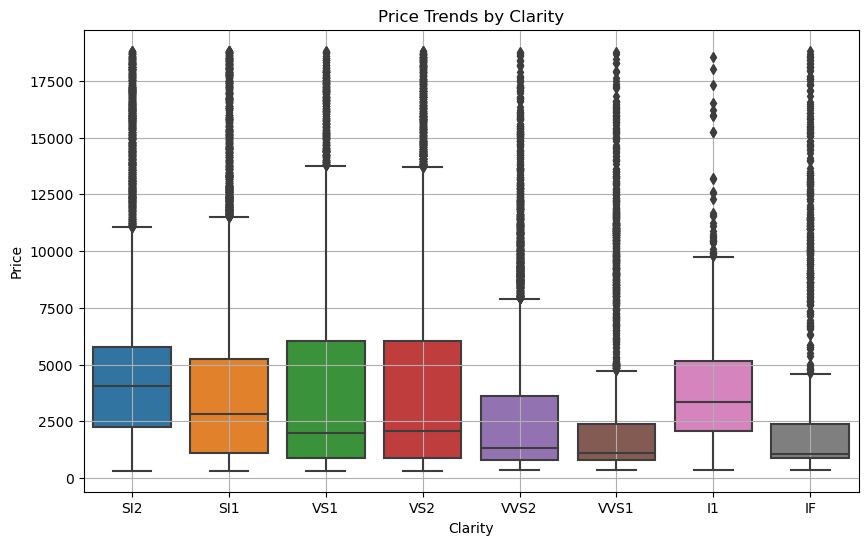

In [8]:
# Visualization: (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df_new)
plt.title('Price Trends by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Distribution of the Target Variable (Price)

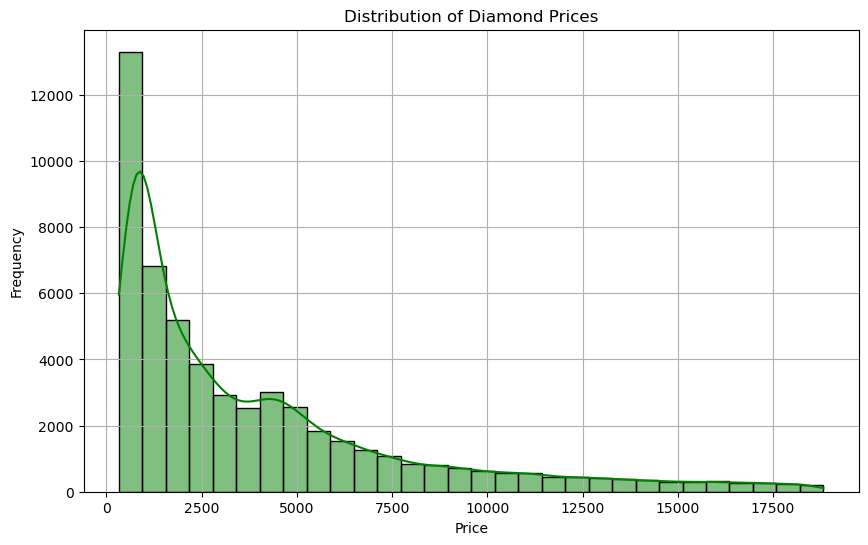

In [9]:


# Visualization 2: Distribution of the Target Variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df_new['price'], bins=30, kde=True, color='green')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# Distribution of Carat, Depth, and Table

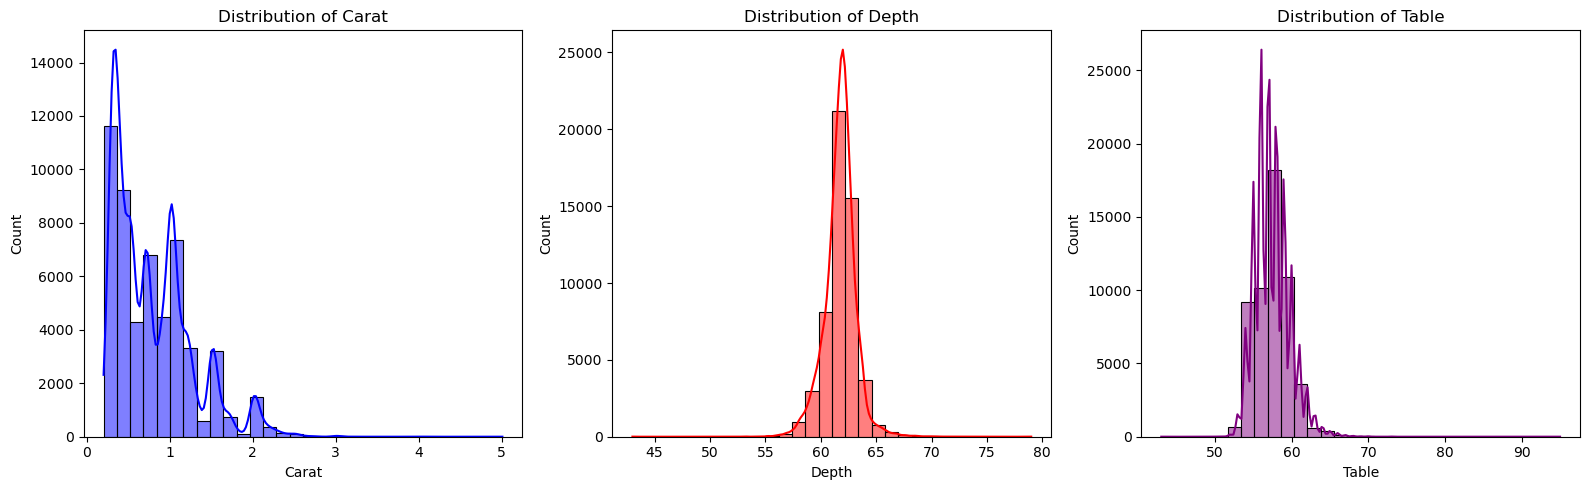

In [10]:

# Visualization 3: Distribution of Carat, Depth, and Table
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_new['carat'], bins=30, kde=True, color='blue')
plt.title('Distribution of Carat')
plt.xlabel('Carat')

plt.subplot(1, 3, 2)
sns.histplot(df_new['depth'], bins=30, kde=True, color='red')
plt.title('Distribution of Depth')
plt.xlabel('Depth')

plt.subplot(1, 3, 3)
sns.histplot(df_new['table'], bins=30, kde=True, color='purple')
plt.title('Distribution of Table')
plt.xlabel('Table')

plt.tight_layout()
plt.show()



# Create a 3D plot of Carat, Price, and Depth

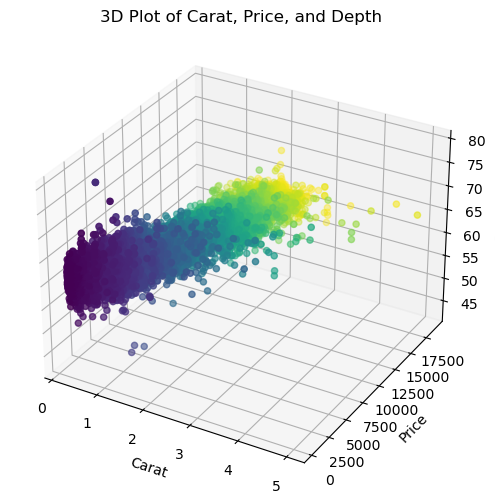

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of Carat, Price, and Depth
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with carat, price, and depth
ax.scatter(df_new['carat'], df_new['price'], df_new['depth'], c=df_new['price'], cmap='viridis', marker='o')

# Setting labels
ax.set_title('3D Plot of Carat, Price, and Depth')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Depth')

plt.show()


# Actual Vs Predicted Diamond Prices

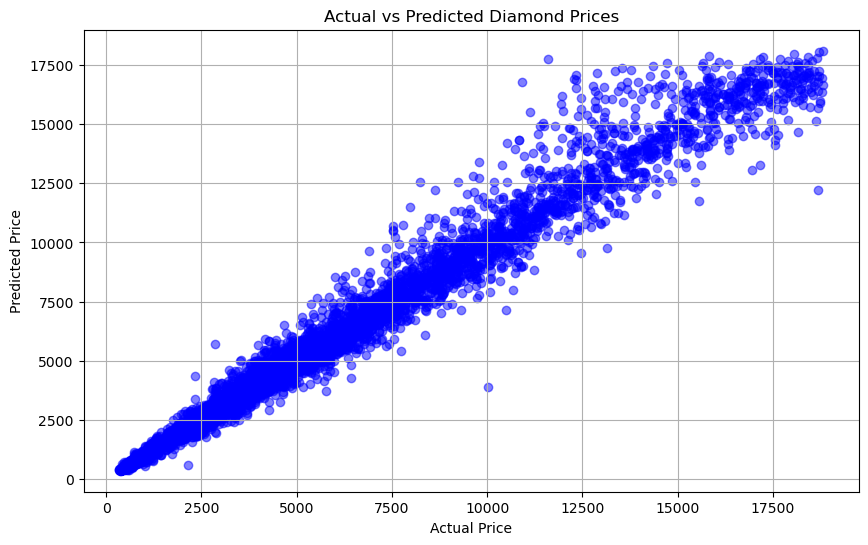

In [17]:
import matplotlib.pyplot as plt

# Plotting the Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Diamond Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


# Feature Importance Comparison (Random Forest)

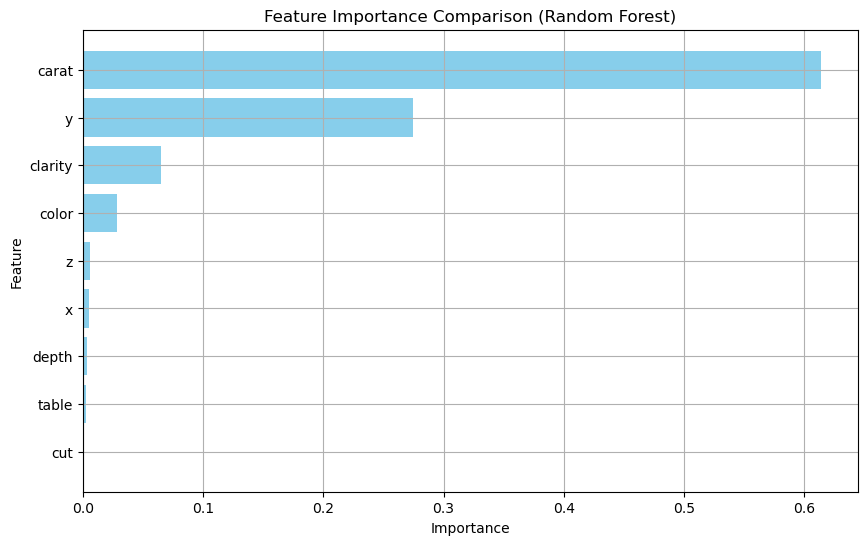

In [18]:
# Retrieve feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance comparison
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.title('Feature Importance Comparison (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)
plt.show()


# Residuals Vs Predicted Prices

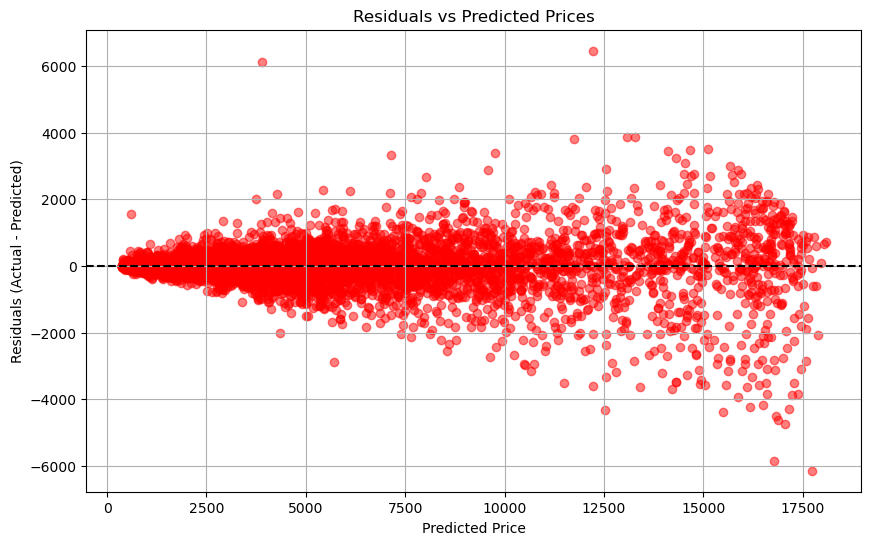

In [19]:
# Calculate residuals (difference between actual and predicted prices)
residuals = y_test - y_pred

# Plot the residuals to check model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()




# Distribution Of Residuals

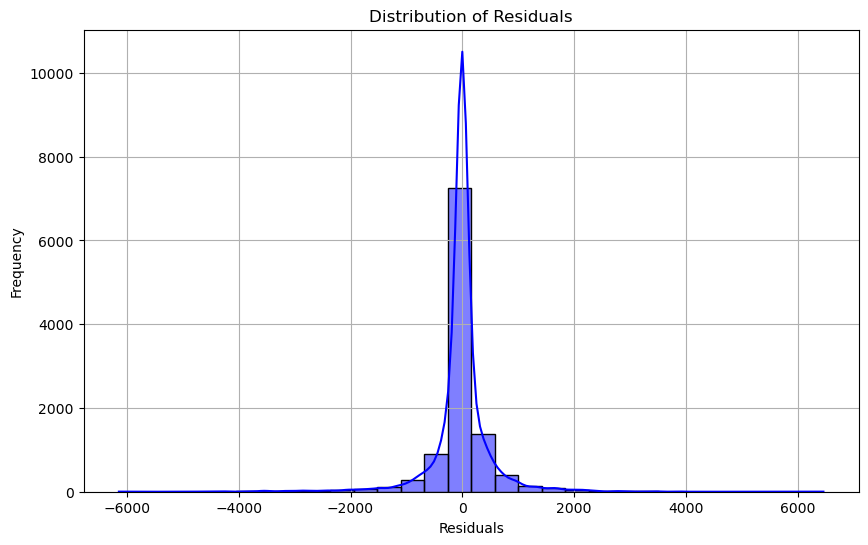

In [20]:

# Plot distribution of residuals to check for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

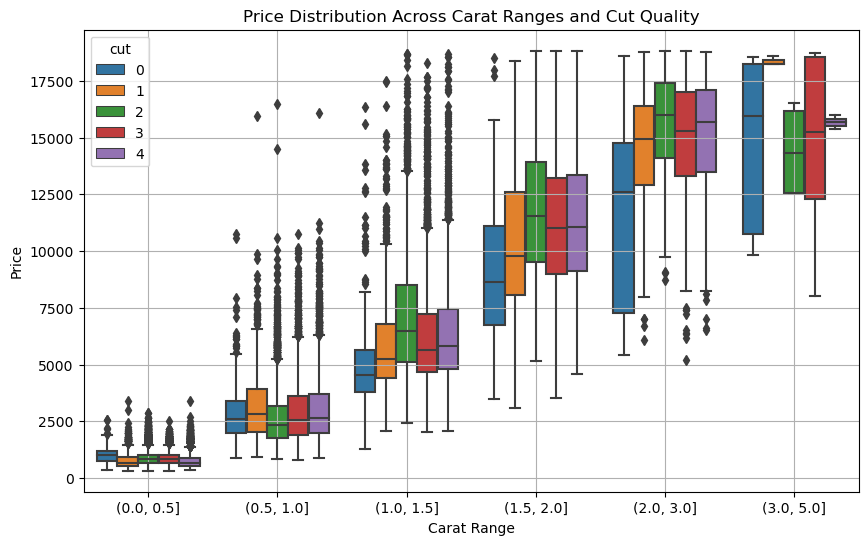

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Visualization 1: Price distribution across carat ranges and cut quality
df_new['carat_range'] = pd.cut(df_new['carat'], bins=[0, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0])
plt.figure(figsize=(10, 6))
sns.boxplot(x='carat_range', y='price', hue='cut', data=df_new)
plt.title('Price Distribution Across Carat Ranges and Cut Quality')
plt.xlabel('Carat Range')
plt.ylabel('Price')
plt.grid(True)
plt.show()



#  Heatmap of price distribution based on clarity and color

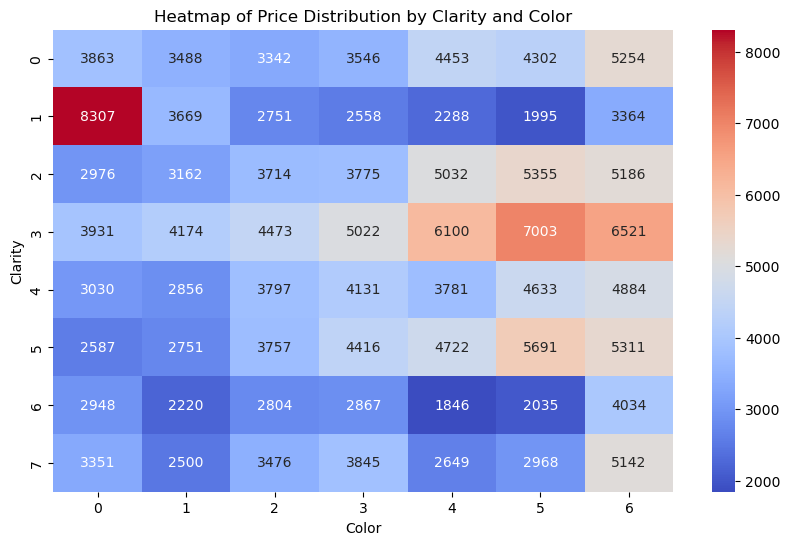

In [24]:
#  Heatmap of price distribution based on clarity and color
price_pivot = df_new.pivot_table(values='price', index='clarity', columns='color', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(price_pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap of Price Distribution by Clarity and Color')
plt.xlabel('Color')
plt.ylabel('Clarity')
plt.show()




# Price trends by carat and clarity

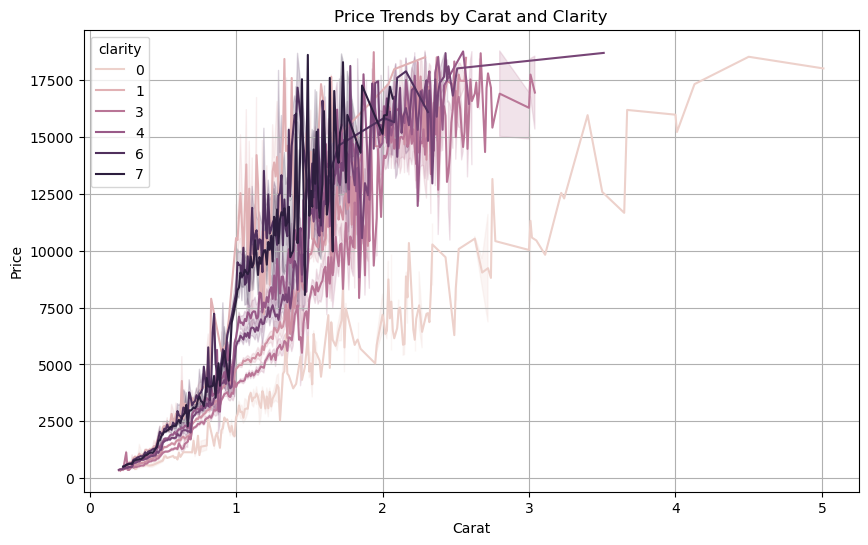

In [26]:
#  Price trends by carat and clarity
plt.figure(figsize=(10, 6))
sns.lineplot(x='carat', y='price', hue='clarity', data=df_new)
plt.title('Price Trends by Carat and Clarity')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()
